In [7]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10   # Time and Hz, i.e. labels
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15  # Time(x) tick values
plt.rcParams['ytick.labelsize'] = 15  # Hz(y) tick values
plt.rcParams['legend.fontsize'] = 17
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['axes.titlesize'] = 14   # Title font

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline
PI2 = np.pi * 2

import soundcard as sc
import IPython.display as ipd

from constants import *

# get a list of all speakers:
speakers = sc.all_speakers()
# get the current default speaker on your system:
default_speaker = sc.default_speaker()
# get a list of all microphones:
mics = sc.all_microphones()
# get the current default microphone on your system:
default_mic = sc.default_microphone()

from pitch_perfect_max_peak import make_spectrum

def freq2key(freq):
    frequencies = np.array(list(KEY_FREQUENCY_MAP.values()))
    return FREQUENCY_KEY_MAP[
        frequencies[
            np.argmin(
                np.abs(frequencies - freq)
                )
            ]
        ]

In [5]:
with open('key_freq_mapping') as f:
    lines = f.read().splitlines()
kf_map = { float(l.split()[1]):l.split()[0] for l in lines}

KEYS = list(kf_map.values())
FREQS = np.array(list(kf_map.keys()))

# Analyze interactively

No handles with labels found to put in legend.


e3 328.0


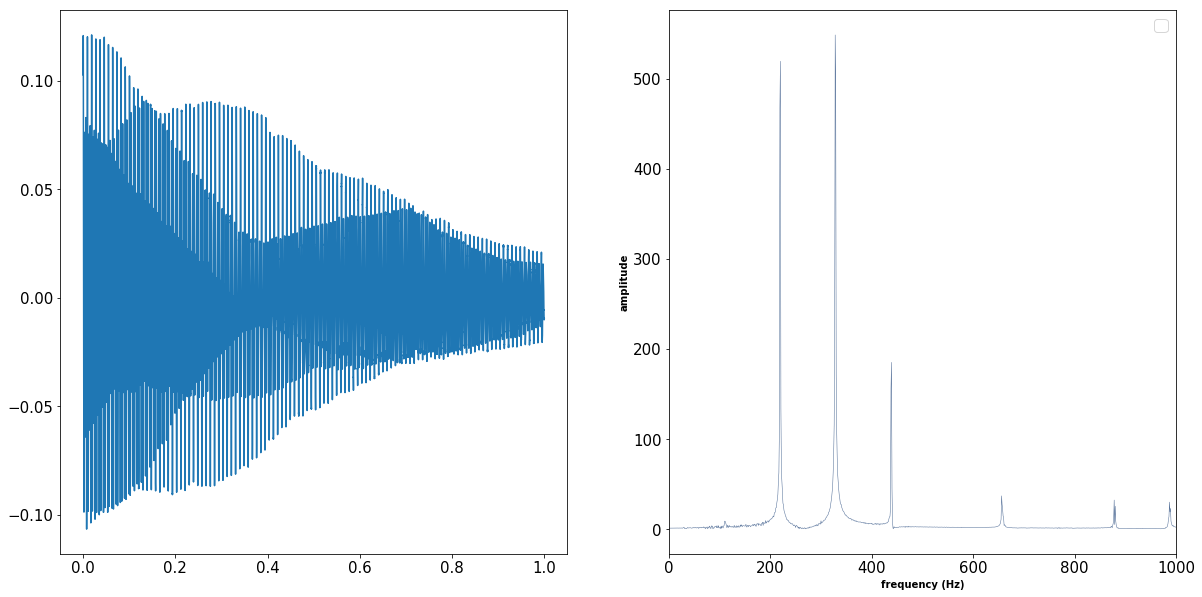

In [21]:
ys = default_mic.record(samplerate=44100, numframes=44100*2, channels=1)
ys = ys[44100:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[0, 1000])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
from datetime import datetime
plt.savefig(f'images/{datetime.now()}.png')